In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.15.0


### Simple_Linear_Regression
y = ax + b

In [2]:
#1 데이터 생성
X = [1,2,3]
Y = [1,2,3]

# 2 hypothesis
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

def hypothesis(x):
    return W*x + b

# 3 cost function
def cost_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# 4 optimizer
optimizer = tf.optimizers.SGD(learning_rate = 0.01)

# 5 train
def train():
    # tf.GradientTape() => 자동으로 미분계산
    with tf.GradientTape() as g:
        pred = hypothesis(X)                 # y = W*x + b
        cost = cost_fn(pred, Y)              # Loss = 1/N * sum ( square(y_pred-y_true) )

    # gradient 계산
    gradients = g.gradient(cost, [W,b])      # dy_dx : [cost_W, cost_b]

    # gradient에 따라서 W,b 업데이트
    optimizer.apply_gradients(zip(gradients, [W,b]))

In [3]:
# tf.Variable
print(W.numpy())

[-1.4159136]


In [4]:
# reduce mean
a2 = np.ones([2,3])
b2 = np.array([[1.,1.],
              [2.,2.]])
print(b2)
print(tf.reduce_mean(b2).numpy())

[[1. 1.]
 [2. 2.]]
1.5


In [5]:
# zip
a2 = [170,175,180]
b2 = [70,80,90]

for i in zip(a2,b2):
  print(i)

for i,j in zip(a2,b2):
  print(i,j)

(170, 70)
(175, 80)
(180, 90)
170 70
175 80
180 90


In [6]:
# training
for step in range(1000):
  train()

  if step % 100 == 0:
    pred = hypothesis(X)
    cost = cost_fn(pred, Y)
    print(f"step = {step}, cost = {cost}, W = {W.numpy()}, b = {b.numpy()}")

step = 0, cost = 45.3436279296875, W = [-1.091342], b = [-2.3309805]
step = 100, cost = 0.12389737367630005, W = [1.4087946], b = [-0.9293418]
step = 200, cost = 0.0765610933303833, W = [1.3213661], b = [-0.7305406]
step = 300, cost = 0.04731014743447304, W = [1.2526231], b = [-0.57427174]
step = 400, cost = 0.029234783723950386, W = [1.1985847], b = [-0.45142978]
step = 500, cost = 0.01806531473994255, W = [1.1561056], b = [-0.35486472]
step = 600, cost = 0.011163263581693172, W = [1.1227132], b = [-0.278956]
step = 700, cost = 0.0068982006050646305, W = [1.0964637], b = [-0.2192847]
step = 800, cost = 0.004262666683644056, W = [1.0758291], b = [-0.17237756]
step = 900, cost = 0.0026340691838413477, W = [1.0596086], b = [-0.1355046]


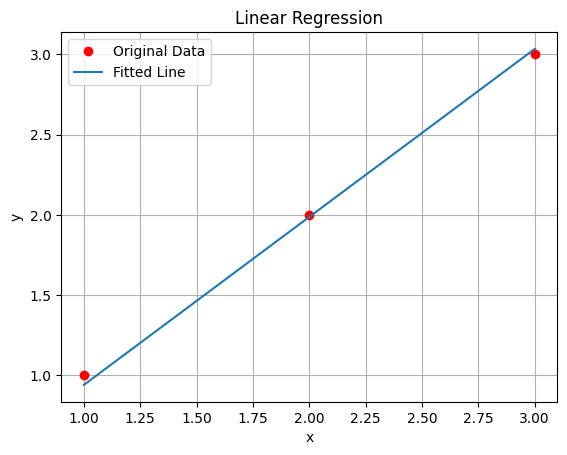

In [15]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(X,Y,"ro", label = "Original Data") # bx
plt.plot(X, np.array(W*X + b), label = "Fitted Line")
plt.legend() # 범례
plt.grid() # 그리드
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [16]:
#prediction
x_test = [10]
x_test_predict = np.array(W*x_test + b)
print("*"*20)
print("if 10 appear, then correct!\n ", x_test_predict)

********************
if 10 appear, then correct!
  [10.362932]


### Non-Linear Modeling
y = a*x^2 + b*x + c

In [17]:
a = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
c = tf.Variable(tf.random.normal([1]))

print(a.numpy())
print(b.numpy())
print(c.numpy())

[-0.19734465]
[-1.6176065]
[-0.3705399]


In [18]:
X = tf.random.normal([50])
Y = X**2 + X*tf.random.normal([50])

In [19]:
X = X.numpy()
Y = Y.numpy()

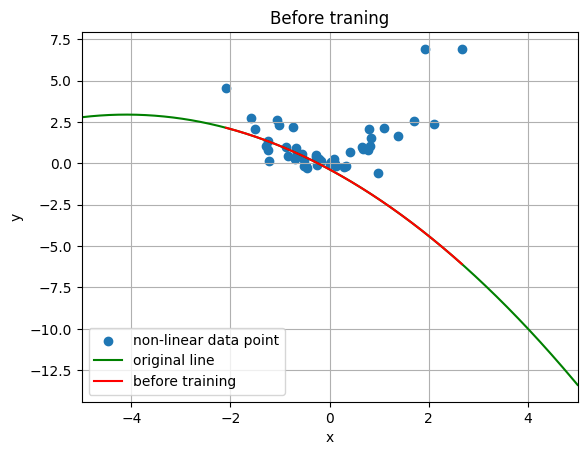

In [20]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*(line_x)**2 + b*(line_x) + c

x_ = np.arange(-5., 5., 0.001)
y_ = a*(x_)**2 + b*(x_) + c

plt.scatter(X, Y, label = "non-linear data point")
plt.plot(x_, y_, "g", label = "original line")
plt.plot(line_x, line_y, "r", label = "before training")
plt.legend()
plt.grid()
plt.title("Before traning")
plt.xlim(-5. , 5.)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [21]:
def hypothesis(x):
  return a*(x)**2 + b*x + c

def cost_fn(pred_y, true_y):
  return tf.reduce_mean(tf.square(pred_y - true_y))

optimizer = tf.optimizers.Adam(learning_rate = 0.01)

def train():
  with tf.GradientTape() as g:
    pred = hypothesis(X)
    cost = cost_fn(pred, Y)

  gradients = g.gradient(cost, [a,b,c])                    # 기울기를 계산하는 부분
  optimizer.apply_gradients(zip(gradients, [a,b,c]))       # 계산된 기울기를 업데이트 해주는 부분

In [22]:
for step in range(1,1001):
  train()

  if step % 100 == 0:
    pred = hypothesis(X)
    cost = cost_fn(pred, Y)
    print(f" step:{step} cost:{cost:.4f} a:{a.numpy()} b:{b.numpy()} c:{c.numpy()} ")
    line_x = np.arange(min(X), max(X), 0.001)
    line_y = a*(line_x)**2 + b*(line_x) + c

 step:100 cost:1.7879 a:[0.5950869] b:[-0.7453598] c:[0.32830483] 
 step:200 cost:0.7710 a:[0.8717638] b:[-0.23969314] c:[0.30648193] 
 step:300 cost:0.6488 a:[0.94009036] b:[-0.022926] c:[0.19255227] 
 step:400 cost:0.6394 a:[0.9559659] b:[0.04455248] c:[0.1575482] 
 step:500 cost:0.6390 a:[0.95778334] b:[0.06022534] c:[0.15246508] 
 step:600 cost:0.6390 a:[0.9573355] b:[0.06328581] c:[0.1527941] 
 step:700 cost:0.6390 a:[0.9570055] b:[0.06391031] c:[0.15325406] 
 step:800 cost:0.6390 a:[0.956887] b:[0.06406066] c:[0.15342899] 
 step:900 cost:0.6390 a:[0.95685434] b:[0.06409821] c:[0.15347761] 
 step:1000 cost:0.6390 a:[0.95684695] b:[0.06410661] c:[0.1534887] 


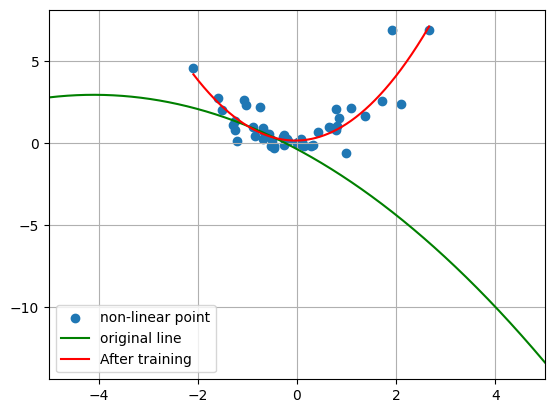

In [23]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*(line_x)**2 + b*(line_x) + c

plt.scatter(X,Y, label = "non-linear point")
plt.plot(x_,y_, 'g', label = "original line")
plt.plot(line_x, line_y, 'r', label = "After training")
plt.legend()
plt.xlim(-5., 5)
plt.grid()
plt.show()